In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [26]:
w=16

In [27]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [28]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x21ec1550040
byteorder:  little
byteswap:  False
type: float64


In [29]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [30]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x21c7c94b040
byteorder:  little
byteswap:  False
type: float64


In [31]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [32]:
training_sample_labels

380256

In [33]:
training_sample

380256

In [34]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [35]:
train_X.shape

(380256, 16, 15)

In [36]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
#print(train_X)

In [38]:
train_y.shape

(380256,)

In [39]:
#print(test_y)

In [40]:
train_y=train_y.reshape(train_y.shape[0],1)

In [41]:
test_y=test_y.reshape(test_y.shape[0],1)

In [42]:
#print(train_X)

In [43]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [44]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])

opt=keras.optimizers.SGD(learning_rate=0.01)
model_gru.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [45]:
model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 16, 128)           55680     
                                                                 
 gru_16 (GRU)                (None, 16, 64)            37248     
                                                                 
 gru_17 (GRU)                (None, 32)                9408      
                                                                 
 dense_10 (Dense)            (None, 50)                1650      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [46]:
 start = t.time()

In [47]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=4096)#, shuffle=False)

Epoch 1/140
93/93 [==============================] - 11s 45ms/step - loss: 0.6355 - accuracy: 0.6514 - val_loss: 0.5615 - val_accuracy: 0.7531
Epoch 2/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5736 - accuracy: 0.7393 - val_loss: 0.5593 - val_accuracy: 0.7531
Epoch 3/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5733 - accuracy: 0.7393 - val_loss: 0.5590 - val_accuracy: 0.7531
Epoch 4/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5732 - accuracy: 0.7393 - val_loss: 0.5589 - val_accuracy: 0.7531
Epoch 5/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5730 - accuracy: 0.7393 - val_loss: 0.5588 - val_accuracy: 0.7531
Epoch 6/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5729 - accuracy: 0.7393 - val_loss: 0.5586 - val_accuracy: 0.7531
Epoch 7/140
93/93 [==============================] - 3s 30ms/step - loss: 0.5727 - accuracy: 0.7393 - val_loss: 0.5585 - val_accuracy: 0.7531
Epoch

93/93 [==============================] - 3s 29ms/step - loss: 0.5376 - accuracy: 0.7405 - val_loss: 0.5247 - val_accuracy: 0.7532
Epoch 59/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5363 - accuracy: 0.7409 - val_loss: 0.5230 - val_accuracy: 0.7533
Epoch 60/140
93/93 [==============================] - 3s 30ms/step - loss: 0.5351 - accuracy: 0.7410 - val_loss: 0.5219 - val_accuracy: 0.7531
Epoch 61/140
93/93 [==============================] - 3s 30ms/step - loss: 0.5338 - accuracy: 0.7411 - val_loss: 0.5205 - val_accuracy: 0.7531
Epoch 62/140
93/93 [==============================] - 3s 30ms/step - loss: 0.5326 - accuracy: 0.7413 - val_loss: 0.5192 - val_accuracy: 0.7531
Epoch 63/140
93/93 [==============================] - 3s 30ms/step - loss: 0.5313 - accuracy: 0.7412 - val_loss: 0.5179 - val_accuracy: 0.7529
Epoch 64/140
93/93 [==============================] - 3s 30ms/step - loss: 0.5301 - accuracy: 0.7413 - val_loss: 0.5166 - val_accuracy: 0.7529
Epoch 65/140

93/93 [==============================] - 3s 29ms/step - loss: 0.5015 - accuracy: 0.7368 - val_loss: 0.4867 - val_accuracy: 0.7526
Epoch 116/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5014 - accuracy: 0.7370 - val_loss: 0.4872 - val_accuracy: 0.7525
Epoch 117/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5013 - accuracy: 0.7370 - val_loss: 0.4870 - val_accuracy: 0.7527
Epoch 118/140
93/93 [==============================] - 3s 30ms/step - loss: 0.5012 - accuracy: 0.7369 - val_loss: 0.4868 - val_accuracy: 0.7529
Epoch 119/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5012 - accuracy: 0.7371 - val_loss: 0.4867 - val_accuracy: 0.7530
Epoch 120/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5011 - accuracy: 0.7371 - val_loss: 0.4865 - val_accuracy: 0.7531
Epoch 121/140
93/93 [==============================] - 3s 29ms/step - loss: 0.5010 - accuracy: 0.7371 - val_loss: 0.4869 - val_accuracy: 0.7530
Epoch 

In [48]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [49]:
stop=t.time()-start
print(stop)

412.4475200176239


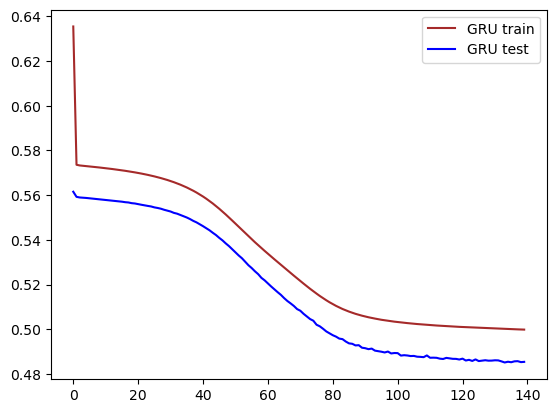

In [50]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

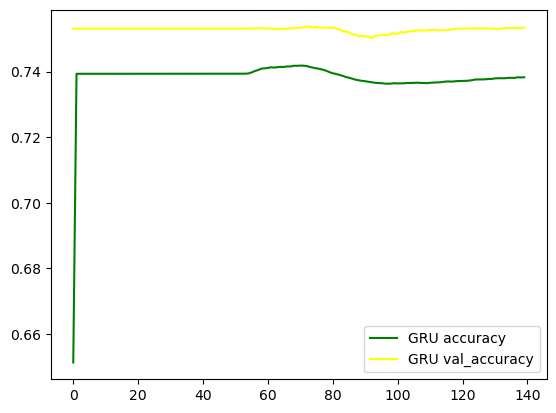

In [51]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [52]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [53]:
np.shape(pred_y)

(95065, 1)

In [54]:
pred_y

array([[0.0226104 ],
       [0.02379348],
       [0.0248394 ],
       ...,
       [0.3398559 ],
       [0.34256217],
       [0.3439111 ]], dtype=float32)

In [55]:
pred_y=np.reshape(pred_y,95065)

0.1629875393369956
0.12355370108400388
0.40371715264154384
0.33362927380803287


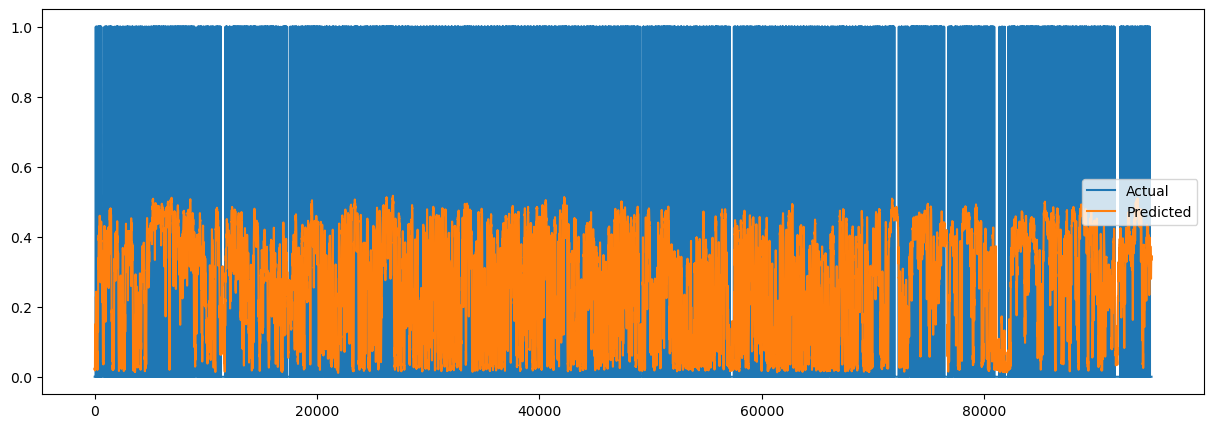

In [56]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [57]:
np.shape(train_X)

(380256, 16, 15)

In [58]:
np.shape(train_y)

(380256, 1)

In [59]:
np.shape(test_X)

(95065, 16, 15)

In [60]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 76s 5ms/step


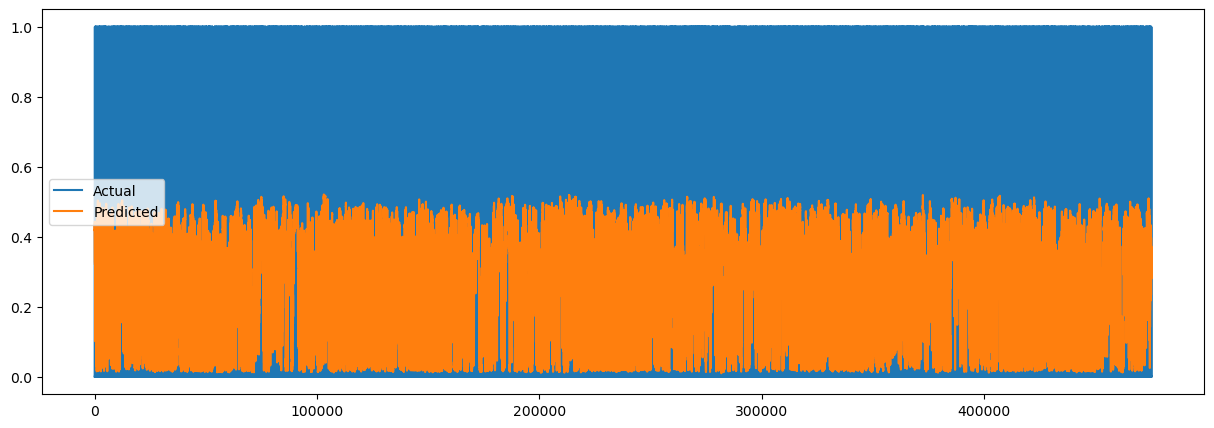

In [61]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

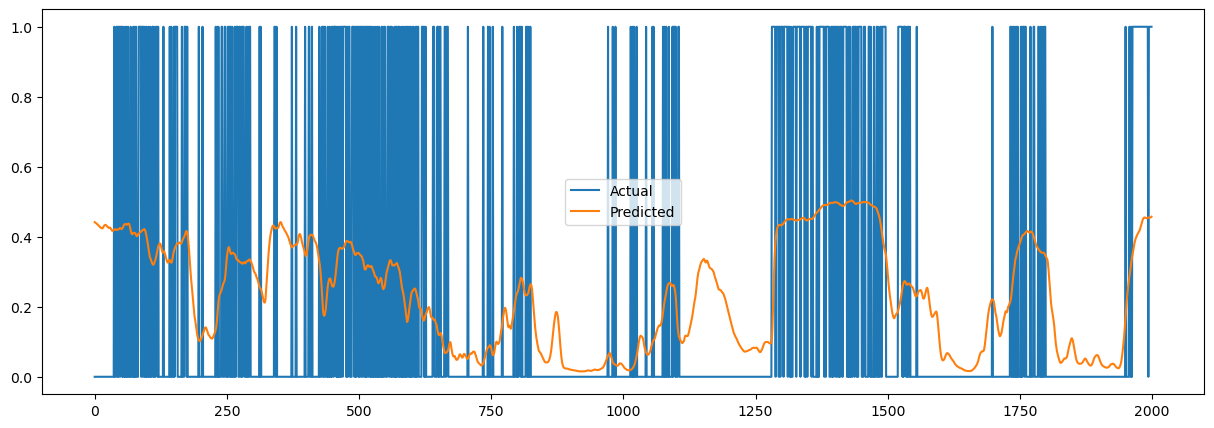

In [62]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [63]:
print(sum(tes)/len(tes))

[0.25794568]


In [64]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.43412359]
[0.74301319]
total acc [0.74134111]


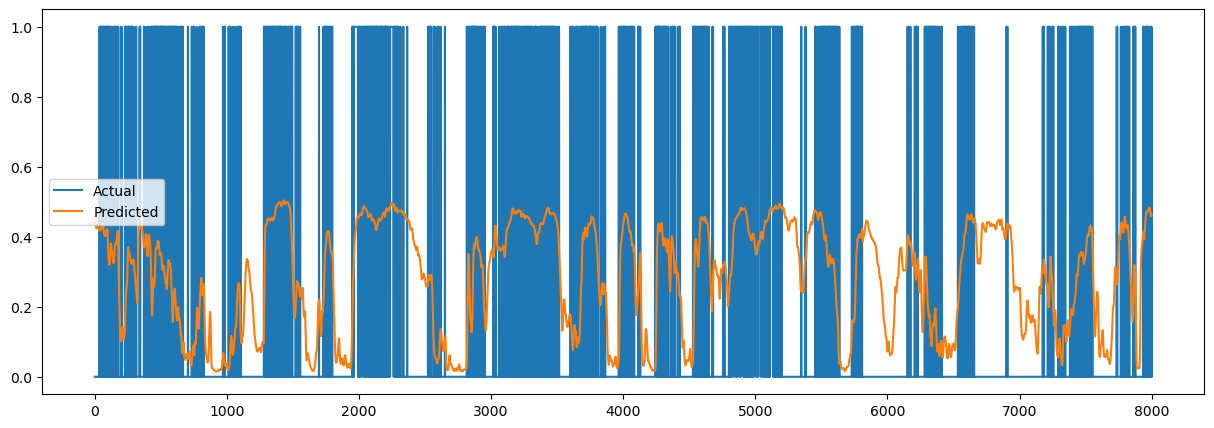

In [65]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

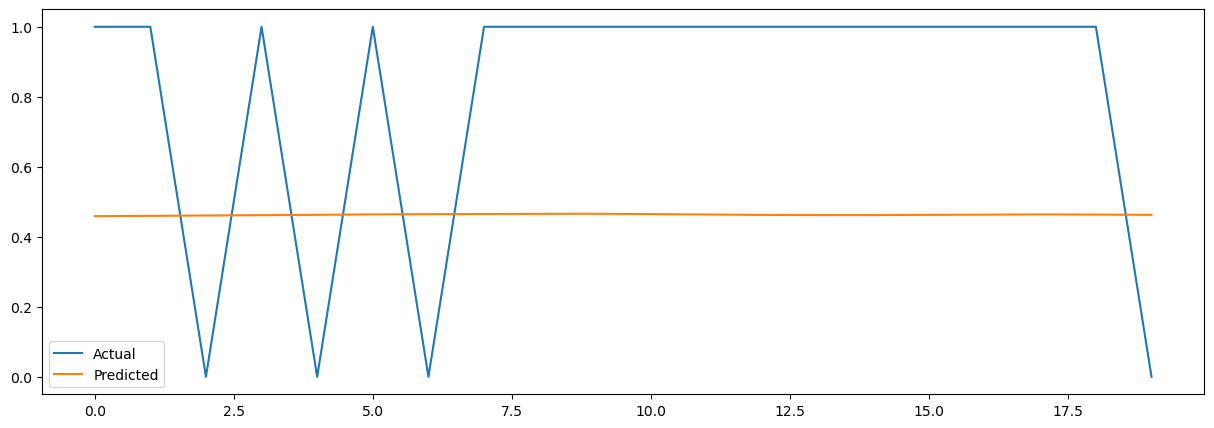

In [66]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

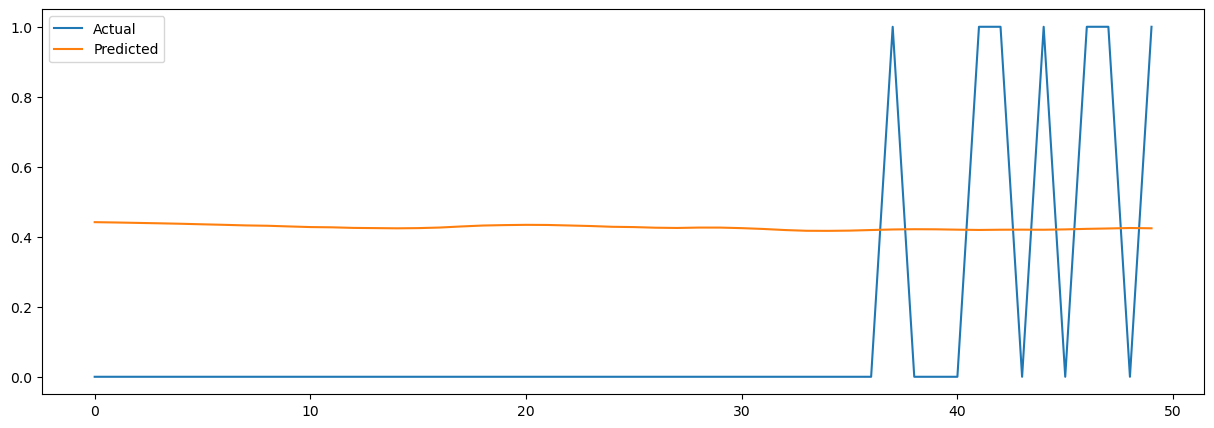

In [67]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

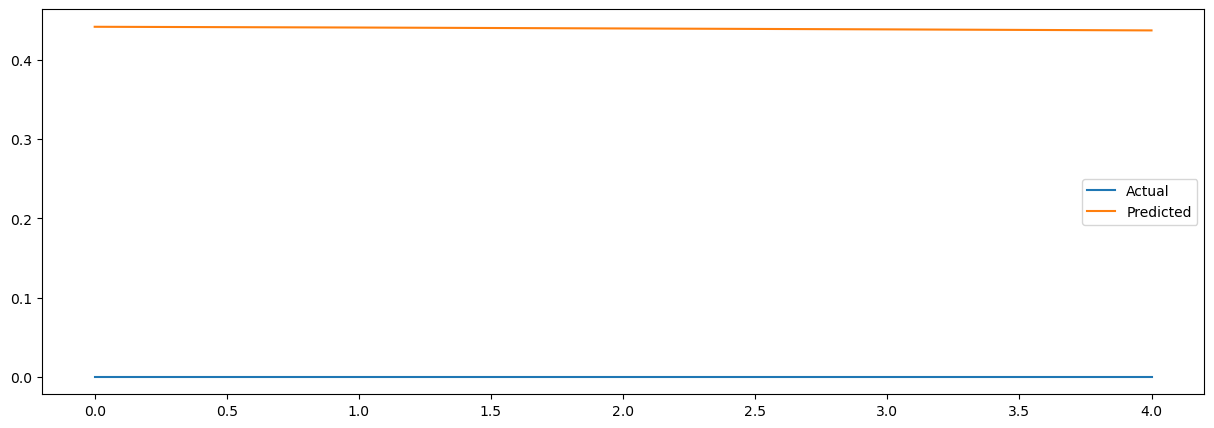

In [68]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [70]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 1006265088, 'peak': 1045901312}